# Navigation

------------------------------------------------------

<a class="anchor-link" href="#Final-project---Spaceship-Titanic">[__1. Final project - Spaceship Titanic.__](#Final-project---Spaceship-Titanic)</a>
        
   - 1.1. Description
   - 1.2. Dataset Description
   - 1.3. Importing libraries
   - 1.4. Reading data
   
<a class="anchor-link" href="#Data-cleaning-and-preparation.">[__2. Data cleaning and preparation.__](#Data-cleaning-and-preparation.)</a>

   - 2.1. Lower column names
   - 2.2. Define wasted data
   - 2.3. Subdivide column data
   - 2.4. Drop or replace wasted data
   
<a class="anchor-link" href="#Exploratory-Data-Analysis">[__3. Exploratory Data Analysis.__](#Exploratory-Data-Analysis)</a>

   - 3.1. Transported probability by destination
   - 3.2. Transported probability by homeplanet
   - 3.3. Transported probability by cryosleep
   - 3.4. Heatmap of correlation
   - 3.5. Transported count by cryosleep and homeplanet
   - 3.6. Transported count by age
   
<a class="anchor-link" href="#Useful-links-and-my-results">[__4. Useful links and results.__](#Useful-links-and-my-results)</a>

# Final project - Spaceship Titanic

### Description

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

<img src = 'https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg'></img>

### Dataset Description

* train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
    - `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    - `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
    - `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    - `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    - `Destination` - The planet the passenger will be debarking to.
    - `Age` - The age of the passenger.
    - `VIP` - Whether the passenger has paid for special VIP service during the voyage.
    - `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    - `Name` - The first and last names of the passenger.
    - `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
* test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
* sample_submission.csv - A submission file in the correct format.
    - `PassengerId` - Id for each passenger in the test set.
    - `Transported` - The target. For each passenger, predict either True or False.
    
### Importing libraries

To begin with, it is enough to add libraries to read the file and apply any actions in relation to them.

- `pandas` - to work with dataframes, used on open source data analysis and as a certain manipulation tool to dataset;
- `matplotlib.pyplot` -  to use pyplot functions that make some changes to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc;
- `numpy` - used for scientific computing, provides a multidimensional array object and more; 
- `seaborn` - for  data visualization (library is based on matplotlib). It provides a high-level interface for drawing attractive and informative statistical graphics;
- `warnings` - to control non-critical issues or errors, mostly to ignore them;
- `sklearn` - used as a collection of tools for predictive data analysis;
- `statsmodels` - to explore data, evaluate statistical models, and perform statistical tests.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.core.common import SettingWithCopyWarning

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

sns.set_theme()
sns.set(font_scale=1.2)
plt.style.use('seaborn-whitegrid')
palette = ['#d01c8b', '#f1b6da', '#b8e186', '#4dac26']

### Reading data

In [2]:
train = pd.read_csv(r"C:\Users\Win10\Desktop\train.csv")
test = pd.read_csv(r"C:\Users\Win10\Desktop\test.csv")
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<a class="anchor-link" href="#Navigation">[__Back to NAVIGATION__](#Navigation)</a>

# Data cleaning and preparation.

### Lower column names

Let's look at the information about each column separately. First of all, I need to convert all my columns in lower register to facilitate my work.

In [5]:
train.columns = train.columns.str.lower()
train.columns

test.columns = test.columns.str.lower()
test.columns

Index(['passengerid', 'homeplanet', 'cryosleep', 'cabin', 'destination', 'age',
       'vip', 'roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck',
       'name'],
      dtype='object')

### Define wasted data

Now I want to know what amount of information is missing there. Talking about NaN, None, NULL objects, I will make sure how many percentage it takes in every column.

The train version:

In [6]:
percentage_of_wastes = ((train.isnull().sum()/train.shape[0])*100).sort_values(ascending = False).round(2)
percentage_of_wastes

cryosleep       2.50
shoppingmall    2.39
vip             2.34
homeplanet      2.31
name            2.30
cabin           2.29
vrdeck          2.16
foodcourt       2.11
spa             2.11
destination     2.09
roomservice     2.08
age             2.06
passengerid     0.00
transported     0.00
dtype: float64

The test dataset:

In [7]:
percentage_of_wastes = ((test.isnull().sum()/test.shape[0])*100).sort_values(ascending = False).round(2)
percentage_of_wastes

foodcourt       2.48
spa             2.36
cabin           2.34
shoppingmall    2.29
name            2.20
cryosleep       2.17
vip             2.17
destination     2.15
age             2.13
homeplanet      2.03
roomservice     1.92
vrdeck          1.87
passengerid     0.00
dtype: float64

In [8]:
train.isnull().sum()

passengerid       0
homeplanet      201
cryosleep       217
cabin           199
destination     182
age             179
vip             203
roomservice     181
foodcourt       183
shoppingmall    208
spa             183
vrdeck          188
name            200
transported       0
dtype: int64

In [9]:
test.isnull().sum()

passengerid       0
homeplanet       87
cryosleep        93
cabin           100
destination      92
age              91
vip              93
roomservice      82
foodcourt       106
shoppingmall     98
spa             101
vrdeck           80
name             94
dtype: int64

### Duplicates

Checking for duplicates in dataset and if we will find them, they're must be dropped, if not the data set is unique.

In [10]:
train.duplicated().sum()

0

In [11]:
test.duplicated().sum()

0

In [12]:
mean = train['roomservice'].mean()
std = train['roomservice'].std()
outlier = abs(train['roomservice']-mean)>3*std
outliersum = outlier.sum()

outliersum

168

### Subdivide column data

Certain columns contain information that can be subdivided into different values.

   - Cabin: The value is composed by __deck/num/side__, where some of these have a reduced number of unique values.
   - PassengerId: The value is composed by __gggg_pp__, where gggg indicates a group and pp indicates the passenger's number within the group.
   - Name: Can be divided into __Name and Surname__.

In [13]:
train[['cabin_deck', 'cabin_num', 'cabin_side']] = train.cabin.str.split('/', expand=True)
train[['passengerid_group', 'passengerid_num']] = train.passengerid.str.split('_', expand=True)
train[['name', 'surname']] = train.name.str.split(' ', expand=True)

In [14]:
train.drop(['cabin', 'passengerid'], axis=1, inplace=True)
train.head(10)

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,cabin_deck,cabin_num,cabin_side,passengerid_group,passengerid_num,surname
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham,False,B,0,P,0001,01,Ofracculy
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna,True,F,0,S,0002,01,Vines
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark,False,A,0,S,0003,01,Susent
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam,False,A,0,S,0003,02,Susent
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy,True,F,1,S,0004,01,Santantines
5,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie,True,F,0,P,0005,01,Hinetthews
6,Earth,False,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex,True,F,2,S,0006,01,Jacostaffey
7,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra,True,G,0,S,0006,02,Jacostaffey
8,Earth,False,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona,True,F,3,S,0007,01,Beston
9,Europa,True,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam,True,B,1,P,0008,01,Flatic


### Drop or replace wasted data

Every passenger in cryosleep must have 0 in every billing column. Using this, we can fill na's of billing columns to 0 when a passenger is in cryosleep.

In [15]:
bill_columns = ['roomservice', 'foodcourt', 'shoppingmall', 'vrdeck', 'spa']
train[train.cryosleep == True][bill_columns] = train[train.cryosleep == True][bill_columns].fillna(0)
test[test.cryosleep == True][bill_columns] = test[test.cryosleep == True][bill_columns].fillna(0)

In [16]:
train[train.cryosleep == True].isna().sum()

homeplanet           75
cryosleep             0
destination          48
age                  82
vip                  75
roomservice          68
foodcourt            70
shoppingmall         96
spa                  65
vrdeck               62
name                 62
transported           0
cabin_deck           84
cabin_num            84
cabin_side           84
passengerid_group     0
passengerid_num       0
surname              62
dtype: int64

In [17]:
test[test.cryosleep == True].isna().sum()

passengerid      0
homeplanet      28
cryosleep        0
cabin           35
destination     32
age             32
vip             29
roomservice     25
foodcourt       39
shoppingmall    35
spa             42
vrdeck          29
name            36
dtype: int64

Also, if a passenger has non zero on some billing and NA in CryoSleep, we can assume that CryoSleep is False.

In [18]:
train['totalspent'] = train[bill_columns].sum(axis=1)
test['totalspent'] = test[bill_columns].sum(axis=1)

train[train.totalspent != 0]['cryosleep'] = train[train.totalspent != 0]['cryosleep'].fillna(False)
test[test.totalspent != 0]['cryosleep'] = test[test.totalspent != 0]['cryosleep'].fillna(False)
train.head()

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,cabin_deck,cabin_num,cabin_side,passengerid_group,passengerid_num,surname,totalspent
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham,False,B,0,P,0001,01,Ofracculy,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna,True,F,0,S,0002,01,Vines,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark,False,A,0,S,0003,01,Susent,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam,False,A,0,S,0003,02,Susent,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy,True,F,1,S,0004,01,Santantines,1091.0


In [19]:
cat_cols = ['homeplanet', 'cryosleep', 'cabin_deck', 'cabin_num', 'cabin_side', 'destination']
for col in cat_cols:
    train[col].fillna("missing", inplace=True)
    
for col in ['homeplanet', 'cryosleep', 'destination']:
    test[col].fillna("missing", inplace=True)

train[cat_cols].isna().sum()

homeplanet     0
cryosleep      0
cabin_deck     0
cabin_num      0
cabin_side     0
destination    0
dtype: int64

In [20]:
num_con_cols = ['roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck']
num_dis_cols = ['age', 'transported']

num_cols = ['roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck', 'age']

for col in num_dis_cols:
    train[col].fillna(train[col].mean(), inplace=True)

for col in num_con_cols:
    train[col].fillna(train[col].median(), inplace=True)
    
test['age'].fillna(test['age'].mean(), inplace=True)

for col in num_con_cols:
    test[col].fillna(test[col].median(), inplace=True)

In [21]:
test

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,totalspent
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,2832.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,7418.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,0.0
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,1018.0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0.0
4275,9273_01,Europa,False,D/297/P,missing,28.658146,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,3203.0


In [22]:
train.drop(["passengerid_group", 'passengerid_num', "name", 'surname', 'vip'], axis=1, inplace=True)

In [23]:
train.isna().sum()

homeplanet      0
cryosleep       0
destination     0
age             0
roomservice     0
foodcourt       0
shoppingmall    0
spa             0
vrdeck          0
transported     0
cabin_deck      0
cabin_num       0
cabin_side      0
totalspent      0
dtype: int64

<a class="anchor-link" href="#Navigation">[__Back to NAVIGATION__](#Navigation)</a>

# Exploratory Data Analysis

Finding mean "transported" by destination.

In [24]:
train[["destination", "transported"]].groupby('destination', as_index=False).mean().sort_values(by="transported", ascending=False)

,destination,transported
0,55 Cancri e,0.610000
3,missing,0.505495
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


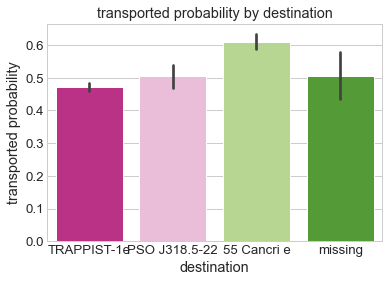

In [25]:
sns.barplot(x="destination", y="transported", data=train, palette = palette)
plt.ylabel('transported probability')
plt.title('transported probability by destination');

In [26]:
train[['homeplanet', 'transported']].groupby('homeplanet', as_index=False).mean().sort_values(by= 'transported', ascending=False)

,homeplanet,transported
1,Europa,0.658846
2,Mars,0.523024
3,missing,0.512438
0,Earth,0.423946


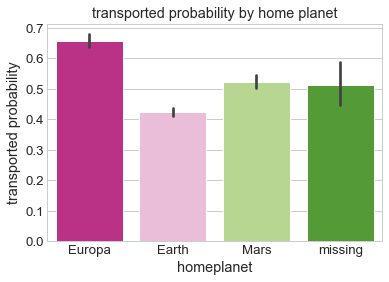

In [27]:
sns.barplot(x = 'homeplanet', y ='transported', data = train, palette = palette)
plt.ylabel('transported probability')
plt.title('transported probability by home planet');

In [28]:
train[['cryosleep', 'transported']].groupby("cryosleep", as_index=False).mean().sort_values(by="transported", ascending=False)

,cryosleep,transported
1,True,0.817583
2,missing,0.488479
0,False,0.328921


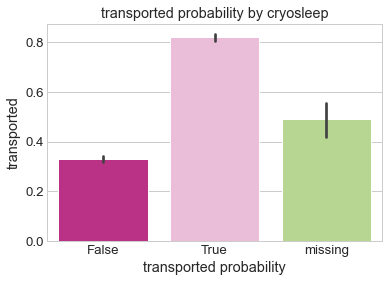

In [38]:
sns.barplot(x="cryosleep", y="transported", data=train, palette = palette)
plt.xlabel("transported probability")
plt.title("transported probability by cryosleep");

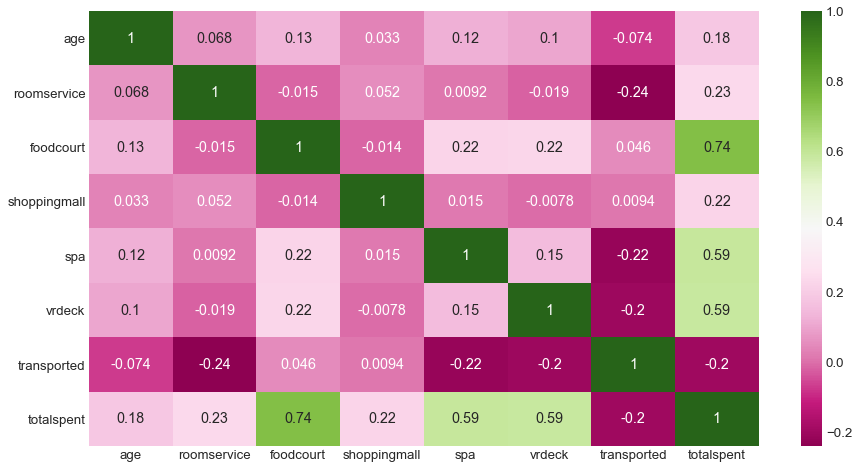

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),annot=True, cmap = 'PiYG');

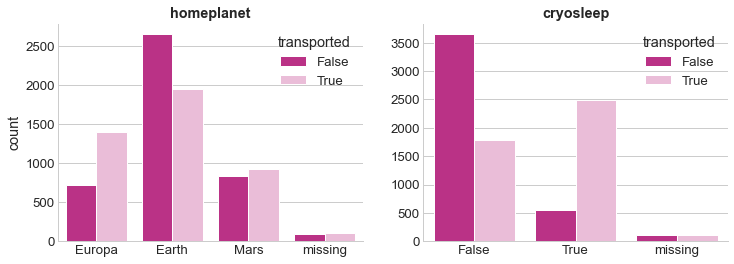

In [31]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
sns.countplot(data=train, x='homeplanet', hue='transported', ax=axs[0], palette = palette)
axs[0].set_title('homeplanet', fontweight='bold')
axs[0].set_xlabel('')
sns.despine()
    
sns.countplot(data=train, x='cryosleep', hue='transported', ax=axs[1], palette = palette)
axs[1].set_title('cryosleep', fontweight='bold')
axs[1].set_xlabel('')
axs[1].set_ylabel('')
sns.despine()

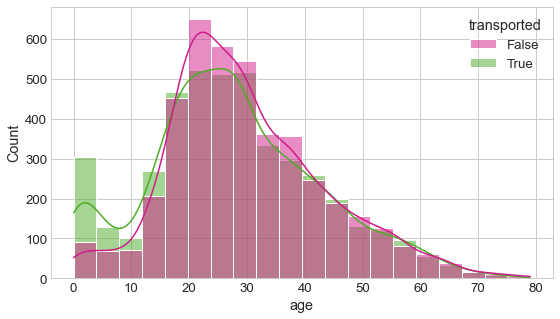

In [32]:
fig, ax = plt.subplots(figsize=(9,5))

sns.histplot(data=train, x='age', hue='transported', bins=20, kde=True, ax=ax, palette = ['#d01c8b', '#4dac26'])

plt.show()

<a class="anchor-link" href="#Navigation">[__Back to NAVIGATION__](#Navigation)</a>

# Modeling

Here I decided to use the Random Forest Classifier. The numerical columns `roomservice`, `foodcourt`, `shoppingmall`, `spa`, `vrdeck`, `age` are the feature importances of the forest, along with their inter-trees variability represented by the error bars.

We will explicitly not shuffle the dataset to ensure that the informative features will correspond to the columns of X. In addition, we will split our dataset into training and testing subsets.

A random forest classifier will be fitted to compute the feature importances. In a nutshell, a random forest algorithm works by creating multiple decision trees, each of which is based on a random subset of the data.

In [33]:
random_forest = RandomForestClassifier()
random_forest.fit(train[num_cols], train['transported'])
r_pred = random_forest.predict(train[num_cols])
acc_ran_for = random_forest.score(train[num_cols], train['transported'])
print(acc_ran_for)

0.9102726331531117


In [34]:
all_X = train[num_cols]
all_y = train['transported']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.1, random_state=1)

random_forest = RandomForestClassifier()
random_forest.fit(train_X,train_y)
predictions = random_forest.predict(test_X)

In [35]:
random_forest = RandomForestClassifier()
random_forest.fit(all_X,all_y)
holdout_predictions = random_forest.predict(test[num_cols])

In [36]:
holdout_ids = test['passengerid']
df = {'passengerid': holdout_ids,
                 'transported': holdout_predictions}

In [37]:
sub = pd.DataFrame(df)
sub.to_csv(r"C:\Users\Win10\Desktop\sub.csv",index=False)

<a class="anchor-link" href="#Navigation">[__Back to NAVIGATION__](#Navigation)</a>

# Useful links and my results

What i got after submission:
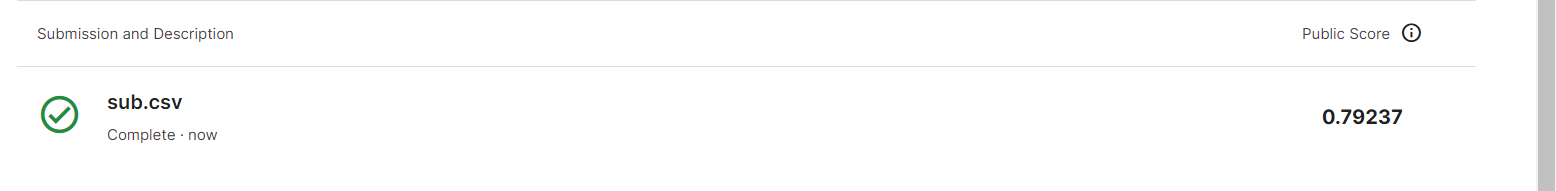

[Random Forest Classifier Python Example](https://vitalflux.com/random-forest-classifier-python-code-example/#:~:text=For%20example%2C%20given%20a%20set,random%20subset%20of%20the%20data.)

[Solution example by MERT KIRAĞI](https://www.kaggle.com/code/mertkra/very-simple-80-accuracy-solution)

[Solution example by AKSHAY DUREJA](https://www.kaggle.com/code/akshaydureja/logistic-regression-with-80-accuracy-on-test-data)